# $Série$ $n°1:$ $compression$ $par$ $RLE$ $et$ $Huffman$

## $Exercice$ $1:$ $Compression$ $par$ $codage$ $RLE$

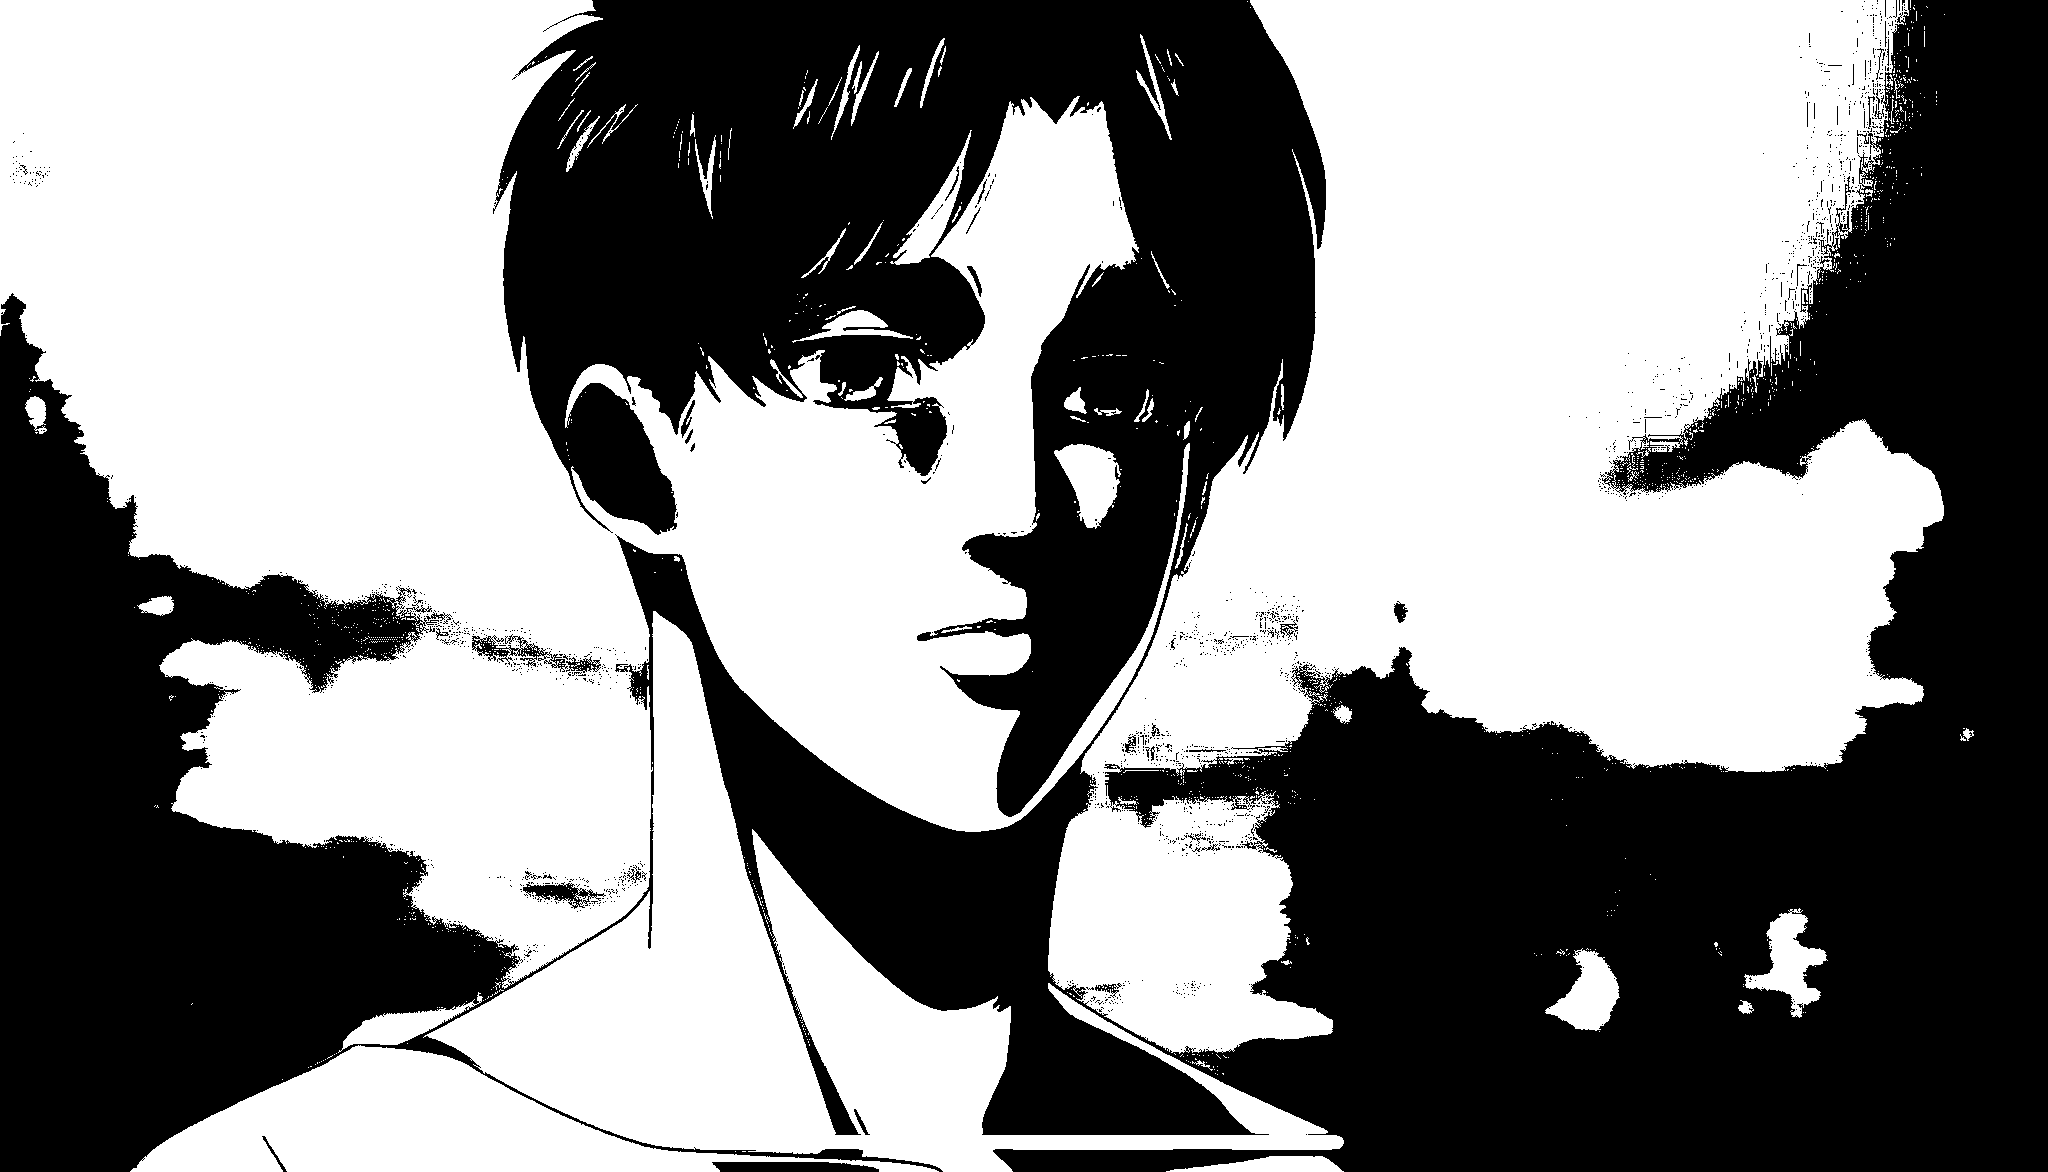

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [162]:
from IPython.display import display
from PIL import Image
import numpy as np

image_file = Image.open("./img/eren_rgb.png") # open colour image
img_bin = image_file.convert('1', dither=Image.NONE) # convert image to black and white
L, C = img_bin.size
img_bin.save('./img/eren_rgb_bin1.png')
display(img_bin)
print(np.array(img_bin))
print(np.array(Image.open('./img/eren_rgb_bin1.png')))

### (1). Retourne la suite des tuples, $(symbol$ $et$ $occur)$ d’une suite de symboles passée en argument ; où $symbol$, $occur$ font référence respectivement à un nouveau symbole trouvé dans la source et sa fréquence d’occurrence.

In [163]:
def sym_occ(data):
    encoded_data = []

    for char in data:
        if not encoded_data:
            encoded_data.append((char, 1))
        else:
            last = encoded_data[-1]

            if last[0] == char:
                encoded_data[-1] = (last[0], last[1] + 1)
            else:
                encoded_data.append((char, 1))

    max_index2 = max(encoded_data, key=lambda x: len(str(x[1])))
    maxim2 = len(str(max_index2[1]))

    return encoded_data, maxim2

### (2). Évalue le code $RLE$ de la suite de symboles initiale.

In [164]:
def code_RLE(data):
    encoded_data, maxim2 = sym_occ(data)
    last = encoded_data[-1]
    code = ""

    for index, (i, j) in enumerate(encoded_data):
        code += i + str(j)
        if index < len(encoded_data) - 1:  # Vérifie si ce n'est pas le dernier élément
            code += '*'

    return code, maxim2

### (3). Calcule le taux de compression.

In [165]:
def taux_compression(data, compressed_data):
    taux = 1 - (len(compressed_data) / len(data))
    return taux * 100

### (4). Implémente l’algorithme de décodage $RLE$.

In [166]:
def decodage_RLE2(data):
    chaine = ""
    i = 0
    while i < len(data):
        # Prendre un caractère de la chaîne
        caractere = data[i]
        taille_sequence = ''
        j = i + 1
        while j < len(data) and data[j] != '*':
            taille_sequence += data[j]
            j += 1
            
        taille_sequence = int(taille_sequence)
        chaine += caractere * taille_sequence
        # Se déplacer à la position suivante après la séquence
        i = j + 1
    return chaine

## $Test$ $de$ $compression$ $et$ $de$ $décompression$

In [167]:
def vecteur_ligne(matrice):
  vecteur = np.array(matrice)
  return vecteur.flatten().tolist()

In [168]:
def inverse_vecteur_ligne(vecteur, lignes, colonnes):
  mat = np.array(vecteur)
  mat = mat.reshape((lignes, colonnes))
  
  return mat

In [169]:
def vecteur_colonne(matrice):
  vecteur = np.ravel(matrice, order = 'F')
  return vecteur.tolist()

In [170]:
def inverse_vecteur_colonne(vecteur, lignes, colonnes):
  aux = lignes
  lignes = colonnes
  colonnes = aux
  mat = np.array(vecteur)
  mat = mat.reshape((lignes, colonnes))
  
  return mat.T

In [171]:
def vecteur_zigzag(matrice):
    matrice = np.array(matrice)
    lignes, colonnes = matrice.shape
    solution = [[] for i in range(lignes + colonnes - 1)]

    for i in range(lignes):
        for j in range(colonnes):
            somme = i + j
            if somme % 2 == 0:
                solution[somme].insert(0, matrice[i, j])
            else:
                solution[somme].append(matrice[i, j])
    
    resultat = np.concatenate(solution)
    
    return resultat.tolist()

In [172]:
def inverse_vecteur_zigzag(vecteur, lignes, colonnes):
    aux = lignes
    lignes = colonnes
    colonnes = aux
    nb_elements = lignes * colonnes
    if len(vecteur) != nb_elements:
        raise ValueError("La longueur du vecteur ne correspond pas au nombre total d'éléments de la matrice.")

    matrice = np.zeros((lignes, colonnes), dtype=np.int32)
    solution = [[] for i in range(lignes + colonnes - 1)]

    for i in range(lignes + colonnes - 1):
        nb_elements = min(i + 1, lignes, colonnes, lignes + colonnes - 1 - i)
        for j in range(nb_elements):
            if i % 2 == 0:
                solution[i].append(vecteur.pop(0))
            else:
                solution[i].insert(0, vecteur.pop(0))

    for i in range(lignes):
        for j in range(colonnes):
            matrice[i, j] = solution[i + j].pop(0)
    
    return matrice.T

In [173]:
def trueOrFalse_to_binary(image):
    image_numerique = []
    for pixel in image:
        if pixel:
            image_numerique.append(1)
        else:
            image_numerique.append(0)
        
    return image_numerique

In [174]:
def RLE_binaire(data):
  chaine = ""
  
  if type(data) == list:
    data = ''.join(str(x) for x in data)

  couple, ind_max = sym_occ(data)
  first = couple[0]
  
  taille = str(first[1]).zfill(ind_max)
  
  if first[0] == '1':
    chaine += '0'
  
  for i, j in couple:
    if j == 1:
      chaine += str(i).zfill(ind_max)  # Ensure i is converted to string
    elif j > 255:
      while j > 255:
        j -= 255
        chaine += "25500" + str(j)
      chaine += str(j).zfill(ind_max)
    else:
      chaine += str(j).zfill(ind_max)
      
  return chaine, ind_max

In [175]:
def compression_RLE_binaire(code, max2, L, C):
  with open('image_compressée_binaire.txt', 'w') as fichier:
    fichier.write(str(L).zfill(5))
    fichier.write(str(C).zfill(5))
    fichier.write(str(max2))
    fichier.write(code)

In [182]:
img_bin = vecteur_ligne(img_bin)
img_bin = trueOrFalse_to_binary(img_bin)
code, max2 = RLE_binaire(img_bin)
print(max2, L, C)
print(sym_occ(img_bin))
compression_RLE_binaire(code, (max2/2), L, C)
print(f"taux de compression: {taux_compression(img_bin, code)} %")

4 2048 1172


([(1, 592), (0, 658), (1, 627), (0, 1), (1, 7), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 2), (0, 3), (1, 3), (0, 2), (1, 1), (0, 137), (1, 593), (0, 654), (1, 1), (0, 2), (1, 614), (0, 1), (1, 12), (0, 1), (1, 7), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 2), (0, 3), (1, 3), (0, 2), (1, 1), (0, 137), (1, 593), (0, 657), (1, 635), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 2), (0, 3), (1, 3), (0, 2), (1, 1), (0, 137), (1, 593), (0, 658), (1, 626), (0, 1), (1, 7), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 2), (0, 1), (1, 5), (0, 2), (1, 1), (0, 137), (1, 593), (0, 658), (1, 634), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 2), (0, 1), (1, 1), (0, 1), (1, 3), (0, 2), (1, 1), (0, 137), (1, 593), (0, 659), (1, 620), (0, 1), (1, 12), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 4), (0, 1), (1, 3), (0, 2), (1, 1), (0, 3), (1, 1), (0, 133), (1, 593), (0, 660), (1, 609), (0, 1), (1, 22), (0, 1), (1, 10), (0, 1), (1, 2), (0, 1), (1, 2), (0, 1), (1, 5), (0, 2), (1, 1), (0, 15), (1, 1

In [177]:
def ASCII_binaire(chaine):
  chaine_binaire = ""
  for caractere in chaine:
    caractere = (bin(ord(caractere)))[2:].zfill(8)
    chaine_binaire += caractere
  return chaine_binaire

In [178]:
def binaire_liste(liste):
  chaine_binaire = ""
  for caractere in liste:
    caractere = (bin(caractere))[2:].zfill(8)
    chaine_binaire += caractere
  return chaine_binaire

In [179]:
def RLE_texte(chaine):
  chaine = ASCII_binaire(chaine)  
  chaine, indice = code_RLE(chaine)
  return chaine, indice

In [180]:
def image_en_binaire(image):
    img_array = np.array(image)
    
    # Get image size
    L, C = image.size
    
    img_list = []
    for row in img_array:  # Iterate over each row
        for pixel in row:   # Iterate over each pixel in the row
            if pixel >= 128:
                img_list.append(1)
            else:
                img_list.append(0)
    img_list = np.array(img_list)
    
    return img_list, (L, C)